# Exploratory Data Analysis of Candidates

The libraries necessary for the correct operation of the code are imported.

In [1]:
import os
import json
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Setting the environment

In [2]:
try:
    os.chdir("../../Workshop_001")
except FileNotFoundError:
    print("""
        FileNotFoundError - Puede que el directorio no exista o no estas ubicad@ en la ruta especificada.
        """)
os.chdir("..")
print(os.getcwd())

c:\Users\natym\Desktop


### Create connection to the database

In [3]:
with open("Workshop_001/credentials.json", "r", encoding = "utf-8") as f:
    credentials = json.load(f)

db_host = credentials["db_host"]
db_name = credentials["db_name"]
db_user = credentials["db_user"]
db_password = credentials["db_password"]

engine = create_engine(f"postgresql://{db_user}:{db_password}@{db_host}:5432/{db_name}")

### Loading data

In [4]:
query = "SELECT * FROM candidates_raw_data;"
candidates_df = pd.read_sql(query, engine)
candidates_df.head()


,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,26/02/2021,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,9/09/2021,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,14/04/2020,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,1/10/2020,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,20/05/2020,Myanmar,13,Mid-Level,Social Media Community Management,9,7


## Dataset Information

In [5]:
candidates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


In [6]:
candidates_df.shape

(50000, 10)

In [7]:
candidates_df.isnull().sum()

First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64

There are no nulls in the dataset

In [8]:
candidates_df.duplicated().sum()

np.int64(0)

And there are no duplicated data aswell

### Changing columns name to lower case

In [9]:
renamed_columns = {
    'First Name': 'first_name',
    'Last Name': 'last_name',
    'Email': 'email',
    'Application Date': 'application_date',
    'Country': 'country',
    'YOE': 'yoe',
    'Seniority': 'seniority',
    'Technology': 'technology',
    'Code Challenge Score': 'code_challenge_score',
    'Technical Interview Score': 'technical_interview_score'
}

candidates_df = candidates_df.rename(columns=renamed_columns)

### Change the type of the date

To work better in operations with the date is important to change to datetime, to have a better manage of it. 

In [10]:
candidates_df['application_date'] = pd.to_datetime(candidates_df['application_date'])
candidates_df.dtypes

C:\Users\natym\AppData\Local\Temp\ipykernel_25808\2449633209.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  candidates_df['application_date'] = pd.to_datetime(candidates_df['application_date'])


first_name                           object
last_name                            object
email                                object
application_date             datetime64[ns]
country                              object
yoe                                   int64
seniority                            object
technology                           object
code_challenge_score                  int64
technical_interview_score             int64
dtype: object

### Look for unique values in each column

It can be observed that although the emails are supposed to be unique, there are some emails that could be repeated, since the total number of rows in the table is 50000 and the emails do not comply with this amount. This would mean that the same person applied several times. 

In [11]:
candidates_df.nunique()

first_name                    3007
last_name                      474
email                        49833
application_date              1646
country                        244
yoe                             31
seniority                        7
technology                      24
code_challenge_score            11
technical_interview_score       11
dtype: int64

Check if there are repeated emails, what they are and how many times they are repeated.

In [12]:
repeated_emails = candidates_df['email'].value_counts()
repeated_emails = repeated_emails[repeated_emails > 1]
print(repeated_emails)

email
marianne31@yahoo.com        3
fern70@gmail.com            3
isaiah24@yahoo.com          2
grady85@gmail.com           2
kelton91@hotmail.com        2
                           ..
marjolaine91@hotmail.com    2
jazmin54@gmail.com          2
reyna2@hotmail.com          2
kasandra68@hotmail.com      2
easter75@gmail.com          2
Name: count, Length: 165, dtype: int64


## Statistical analysis of variables

A summary of the statistics of the dataset is shown in a general way, applied to the numerical variables.

In [13]:
candidates_df.describe()

,application_date,yoe,code_challenge_score,technical_interview_score
count,50000,50000.000000,50000.000000,50000.000000
mean,2020-04-03 23:04:14.592000,15.286980,4.996400,5.003880
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000
25%,2019-02-17 00:00:00,8.000000,2.000000,2.000000
50%,2020-04-06 00:00:00,15.000000,5.000000,5.000000
75%,2021-05-21 00:00:00,23.000000,8.000000,8.000000
max,2022-07-04 00:00:00,30.000000,10.000000,10.000000
std,NaN,8.830652,3.166896,3.165082


A summary of the statistics of the dataset shown ina a general way, applied to cathegorical variables.

In [14]:
candidates_df.describe(include='object')

,first_name,last_name,email,country,seniority,technology
count,50000,50000,50000,50000,50000,50000
unique,3007,474,49833,244,7,24
top,Sarai,Murazik,marianne31@yahoo.com,Malawi,Intern,Game Development
freq,33,138,3,242,7255,3818


In [15]:
print("\nDistribución de países:")
print(candidates_df['country'].value_counts())


Distribución de países:
country
Malawi                          242
Spain                           238
Cook Islands                    234
Svalbard & Jan Mayen Islands    234
Netherlands Antilles            234
                               ... 
Libyan Arab Jamahiriya          172
Cape Verde                      172
Isle of Man                     170
Tanzania                        165
Cocos (Keeling) Islands         164
Name: count, Length: 244, dtype: int64


## Exploratory Data Analysis

Seniority distribution

C:\Users\natym\AppData\Local\Temp\ipykernel_25808\3755940841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='seniority', data=candidates_df, order=candidates_df['seniority'].value_counts().index, palette='viridis')


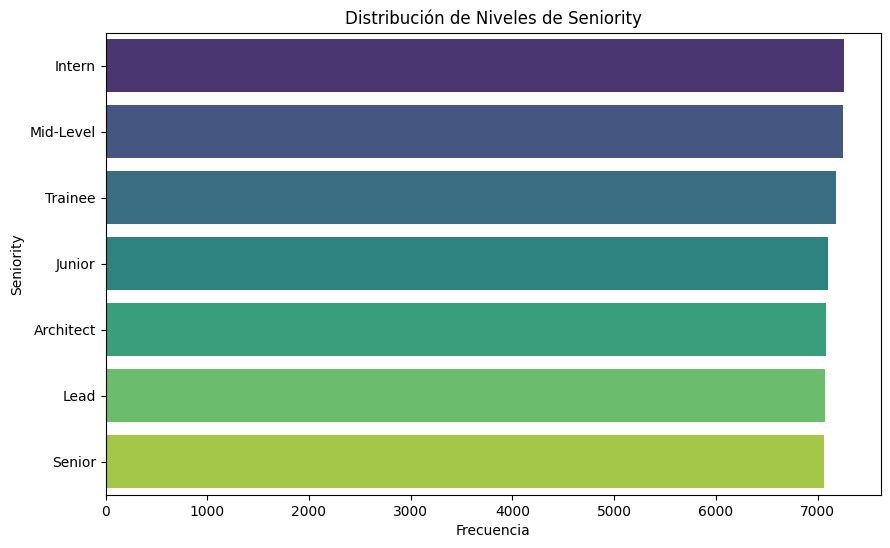

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(y='seniority', data=candidates_df, order=candidates_df['seniority'].value_counts().index, palette='viridis')
plt.title('Distribución de Niveles de Seniority')
plt.xlabel('Frecuencia')
plt.ylabel('Seniority')
plt.show()

Technology distribution

C:\Users\natym\AppData\Local\Temp\ipykernel_25808\158940212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='technology', data=candidates_df, order=candidates_df['technology'].value_counts().index, palette='magma')


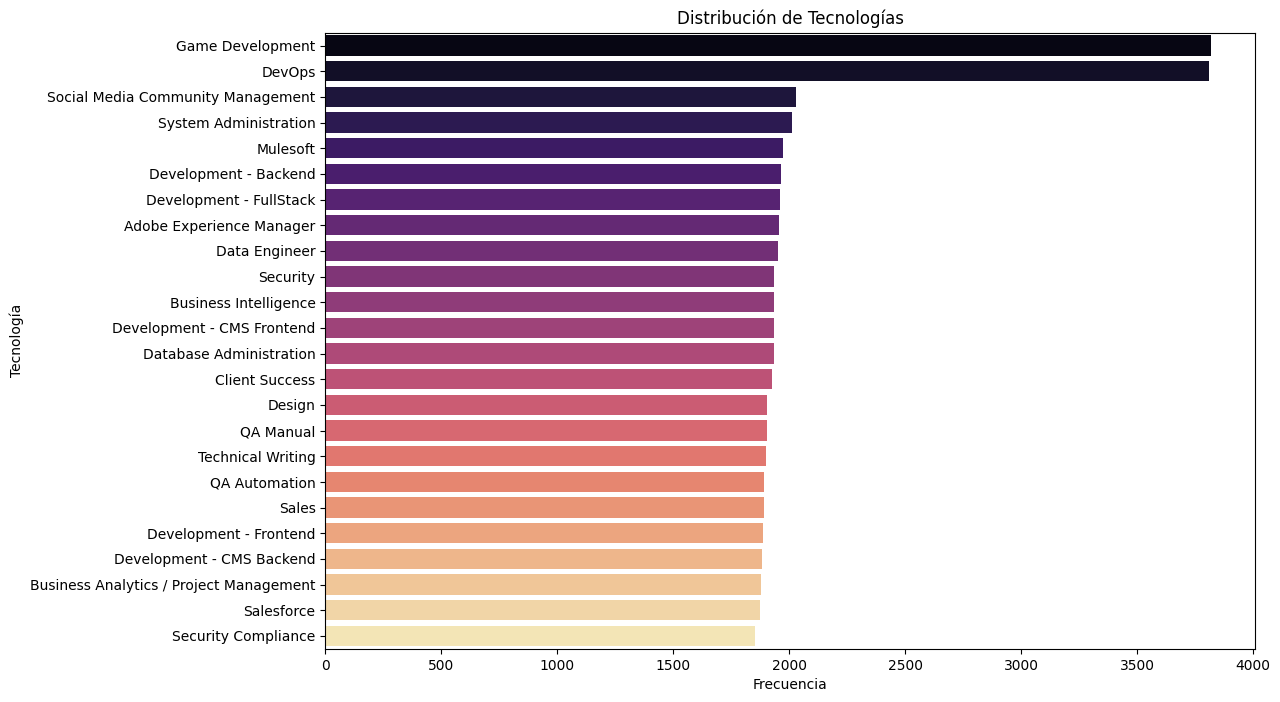

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(y='technology', data=candidates_df, order=candidates_df['technology'].value_counts().index, palette='magma')
plt.title('Distribución de Tecnologías')
plt.xlabel('Frecuencia')
plt.ylabel('Tecnología')
plt.show()

Correlation between numeric variables

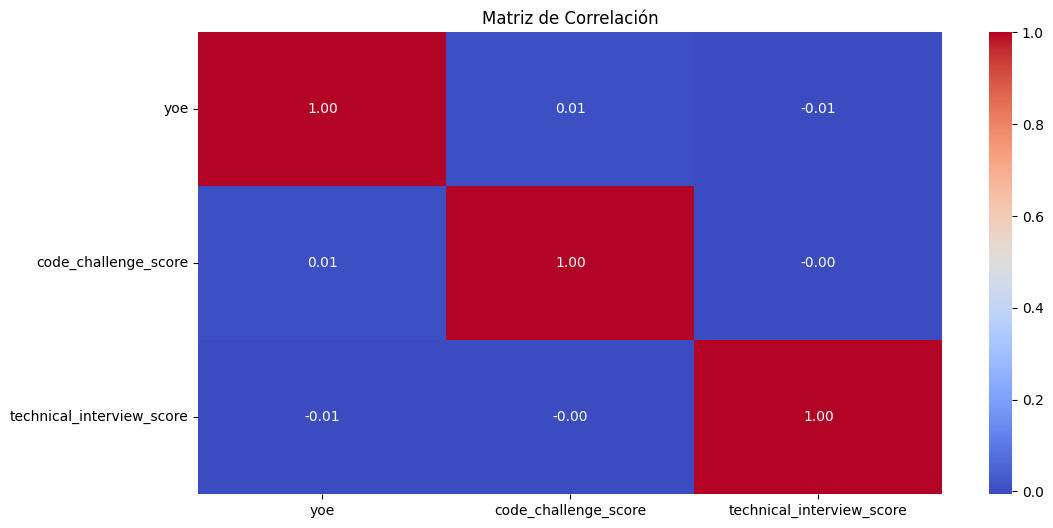

In [18]:
numeric_columns = candidates_df.select_dtypes(include=[np.number]).columns
corr_matrix = candidates_df[numeric_columns].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Applications per year

It can be seen that in 2022 there was a considerable reduction in the number of applications, due to the fact that the data is not taking the entire 2022, it is taking up to July. 

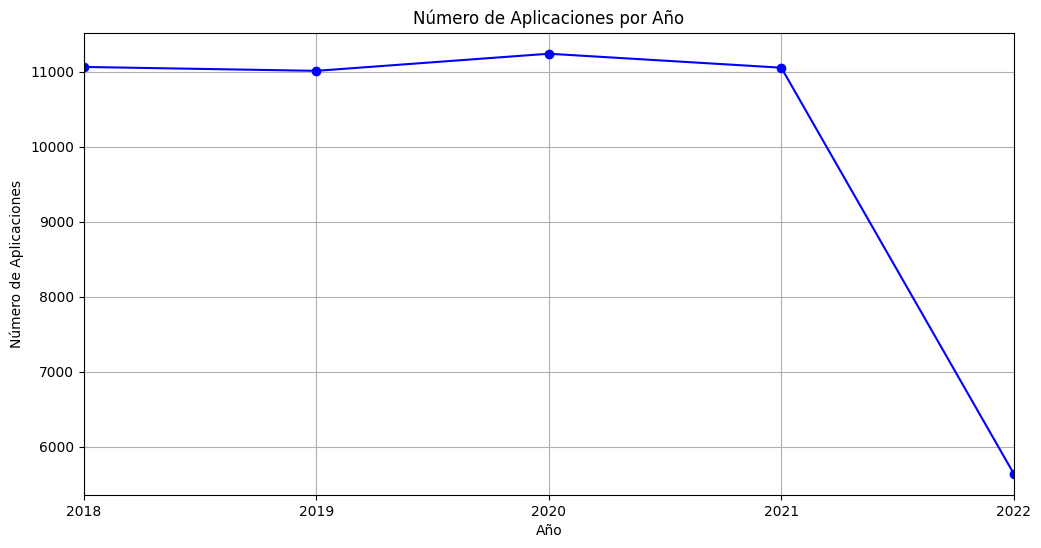

In [19]:
candidates_df['application_year'] = candidates_df['application_date'].dt.to_period('Y')

# Contar el número de aplicaciones por año
applications_per_year = candidates_df['application_year'].value_counts().sort_index()

# Visualización del número de aplicaciones por año
plt.figure(figsize=(12, 6))
applications_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Número de Aplicaciones por Año')
plt.xlabel('Año')
plt.ylabel('Número de Aplicaciones')
plt.grid(True)
plt.show()

Identify outliers

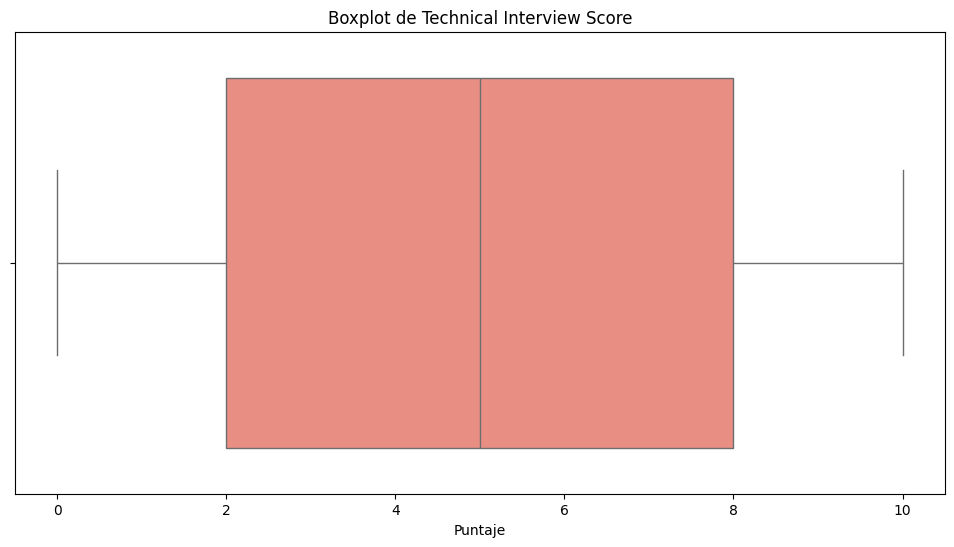

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=candidates_df['technical_interview_score'], color='salmon')
plt.title('Boxplot de Technical Interview Score')
plt.xlabel('Puntaje')
plt.show()

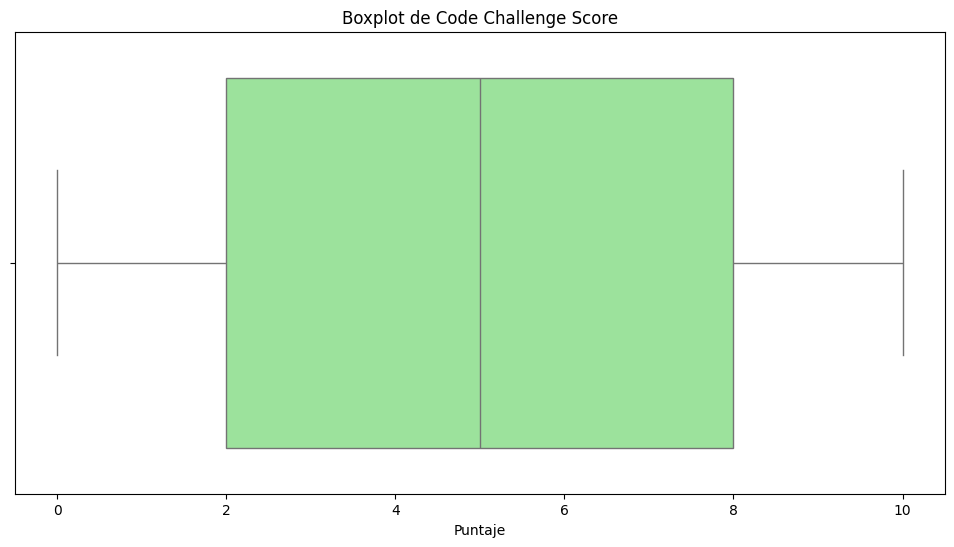

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=candidates_df['code_challenge_score'], color='lightgreen')
plt.title('Boxplot de Code Challenge Score')
plt.xlabel('Puntaje')
plt.show()

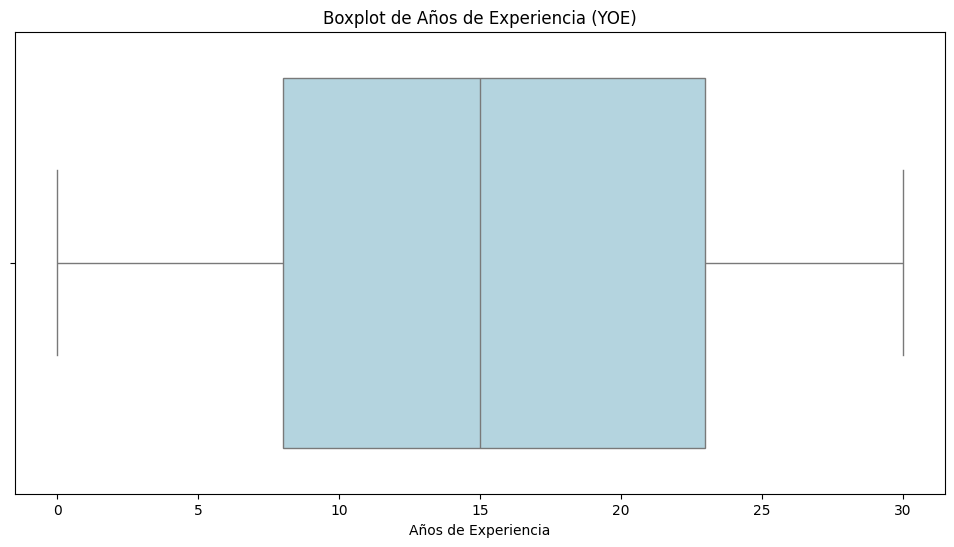

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=candidates_df['yoe'], color='lightblue')
plt.title('Boxplot de Años de Experiencia (YOE)')
plt.xlabel('Años de Experiencia')
plt.show()

## Analysis ¿?

## Filter the hired persons

Filter the persons that are hired based on the scores

In [20]:
hired_candidates_df = candidates_df[(candidates_df['code_challenge_score']>=7) & (candidates_df['technology_interview_score']>=7)]
hired_candidates_df.head()

,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technology_interview_score
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7
8,Mose,Lakin,dale_murazik@hotmail.com,2018-03-13,Italy,18,Lead,Social Media Community Management,7,10
13,Hilda,Rodriguez,jordan.hyatt@hotmail.com,2020-05-09,El Salvador,16,Junior,System Administration,7,8
22,Crawford,Ullrich,bruce.koch7@yahoo.com,2021-01-09,Dominica,14,Junior,Game Development,8,8
